<a href="https://colab.research.google.com/github/Carla9711/Prediction-of-Product-Sales/blob/main/Prediction%20of%20Product%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales

- Author: Carla Cloete

##Project Overview

##Load and Inspect Data

Questions to answer:

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import required packages
import pandas as pd
import numpy as np

In [ ]:
# Save filepath and load data
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# How many rows and columns
df_sales.shape

(8523, 12)

- There are 8523 rows and 12 columns

In [ ]:
# Datatypes of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- There are 5 numeric columns and 7 string columns

##Clean Data

In [ ]:
# check for duplicates
df_sales.duplicated().sum()

0

- There are no duplicates

In [ ]:
# check nulls
col_nulls = df_sales.isna().sum()
col_nulls

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# null percentages
col_nulls/len(df_sales)

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

- There are two columns with null values
  - Item_Weight (17% of values are null)
  - Outlet_Size (28% of values are null)



In [ ]:
# replace missing columns
# replace Item_Weight missing values with -1
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

In [ ]:
# check value counts of Item_Weight
df_sales['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

- The 1463 missing values have been replaced by -1

In [ ]:
# replace Outlet_Size missing values with 'MISSING'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('MISSING')

In [ ]:
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- The 2410 missing values hve been replaced with MISSING

In [ ]:
# find and fix inconsistent categories of data
# check value counts of category columns
# create list of category columns
cat_col = df_sales.select_dtypes('object').columns
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# loop through list of columns and check value counts for each column
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_sales[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


- The Item_Fat_Content column has inconsistent values
    - LF should be replaced with Low Fat
    - reg should be replaces with Regular
    - low fat should be replaced with Low Fat

In [ ]:
# replace inconsistent columns in Item_Fat_Content
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                     'reg':'Regular',
                                                                     'low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:
*   Histograms to view the distributions of numerical features in your dataset.
*   Boxplots to view statistical summaries of numerical features in your dataset.
*   Countplots to view the frequency of each class of categorial features in your dataset.
*   Heatmap to view the correlation between features.









In [ ]:
# import data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# check data
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# find list of numeric columns
col_num = df_sales.select_dtypes('number')
col_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


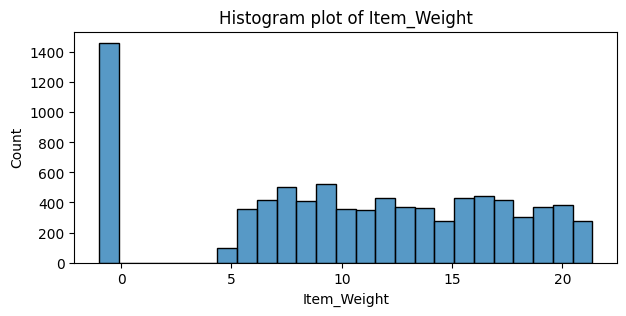

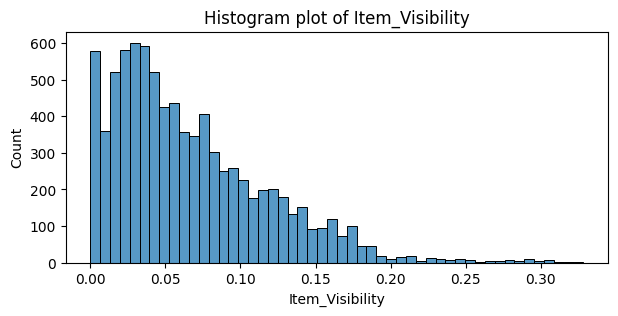

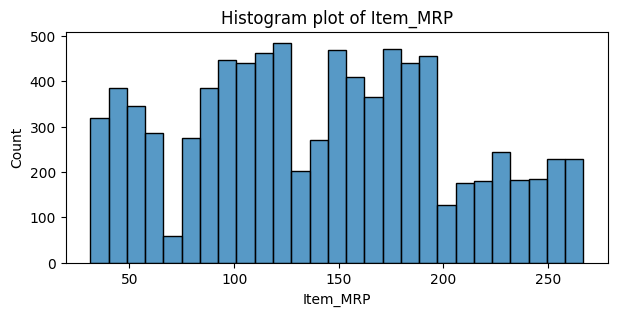

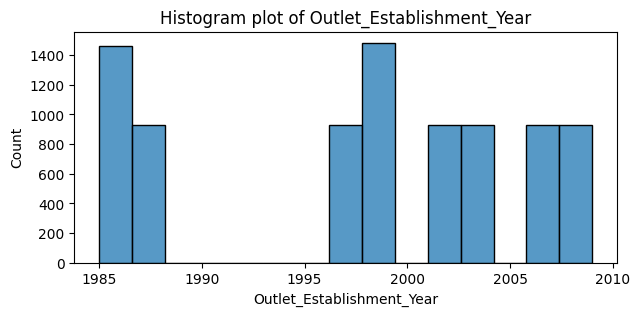

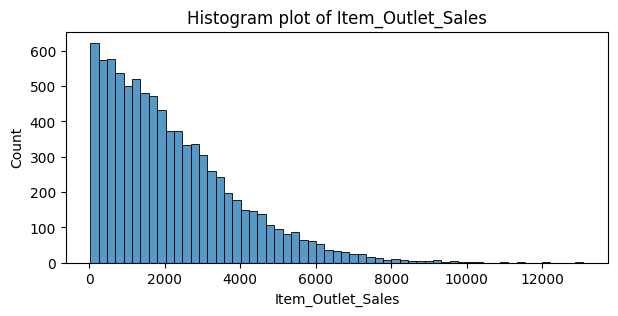

In [ ]:
# Histogram plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.histplot(x=col, data=col_num,bins='auto')
    ax.set_title(f"Histogram plot of {col}")

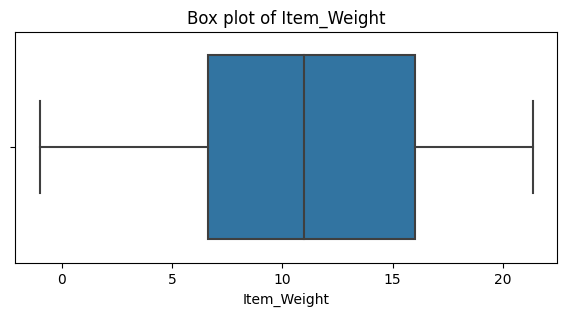

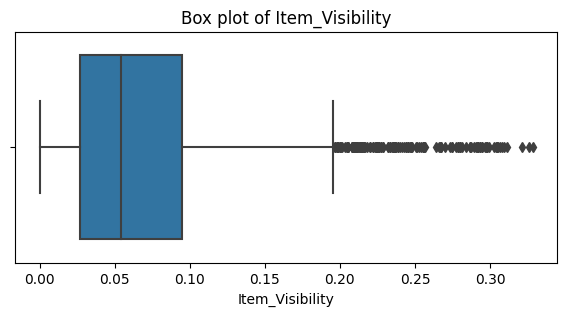

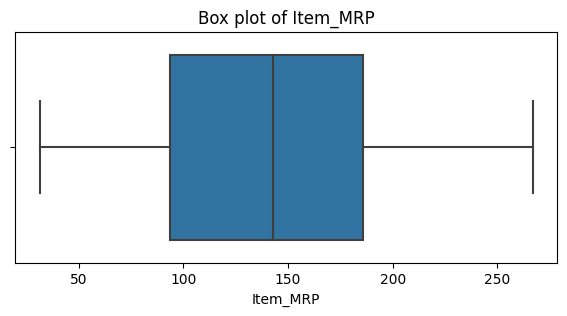

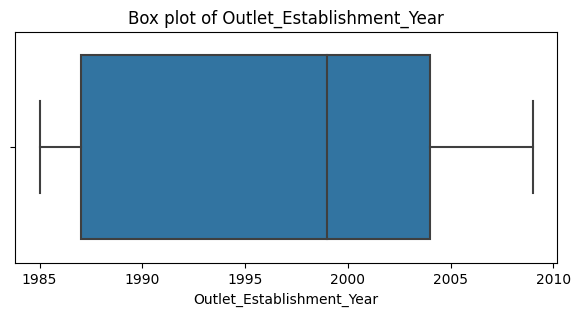

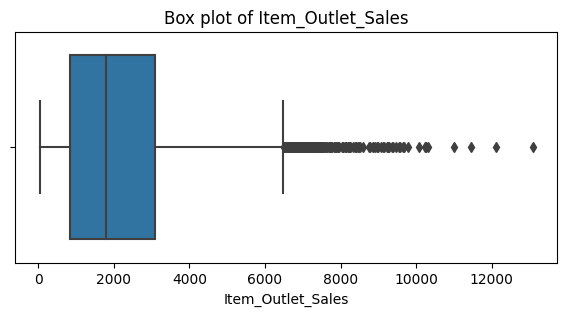

In [ ]:
# Box plot of all numeric columns
for i, col in enumerate(col_num.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.boxplot(x=col, data=col_num)
    ax.set_title(f"Box plot of {col}")

In [ ]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Histogram and Boxplot intepretation for numerical columns:**

Item_Weight:
 - Normal distribution of item weight between 4 and 22
 - 50% of the data points are between 6.65 and 16


Item_Visability
 - Right Skewed
 - 75% of the data lies below 0.095 with the max value being 0.328
 - This indicates that most products have low visabilty in store


Irem_MRP
  -  Trimodal histogram with three peaks.
  -  Data can likely be grouped into three different price ranges
  -  50% of the data lies between 93.8 and 185.6

Item_Outlet_Sales
  - Right Skewed
  - 75% of the data lies bewlow 3101.3 with the max value being 1386.96

In [ ]:
# find list of cat columns
col_cat = df_sales.select_dtypes('object')
col_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
# drop Item_Identifier
col_cat = col_cat.drop(columns='Item_Identifier')
col_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


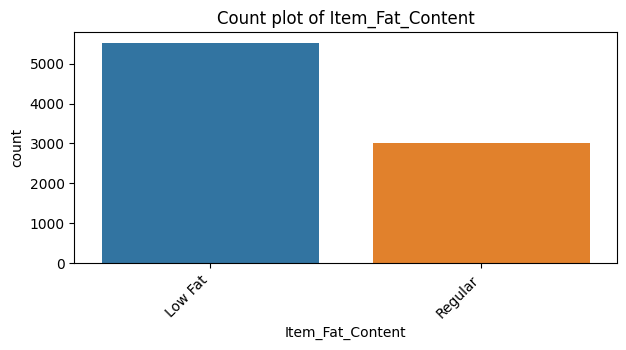

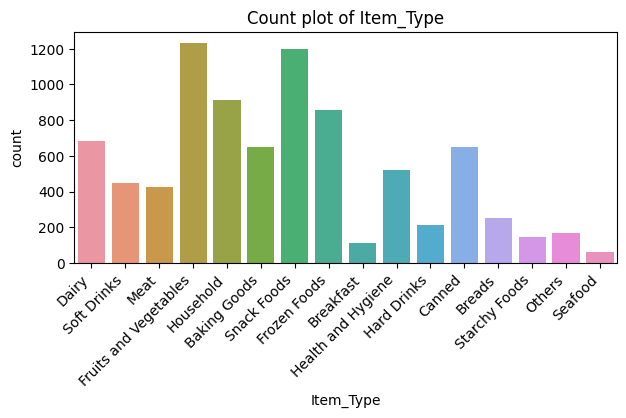

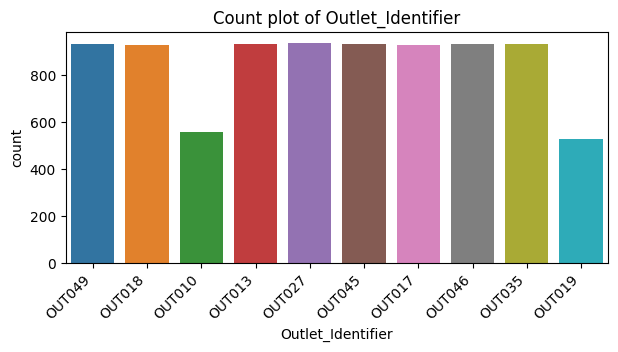

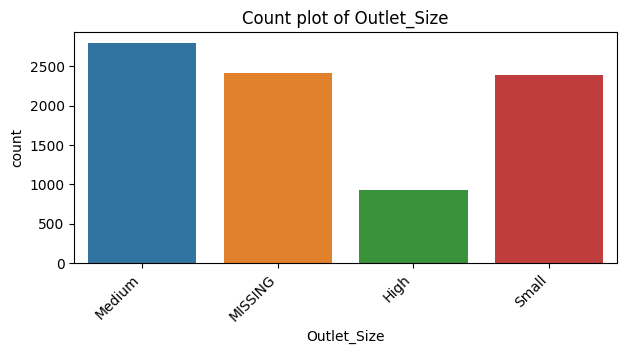

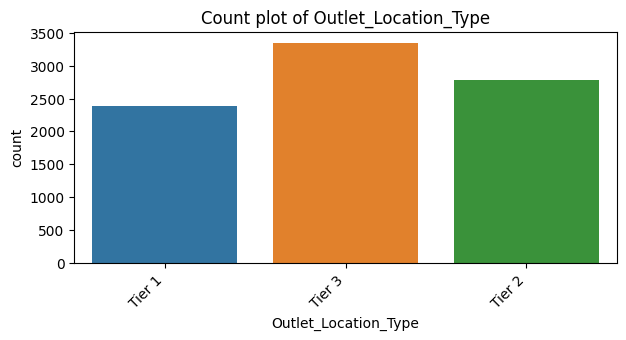

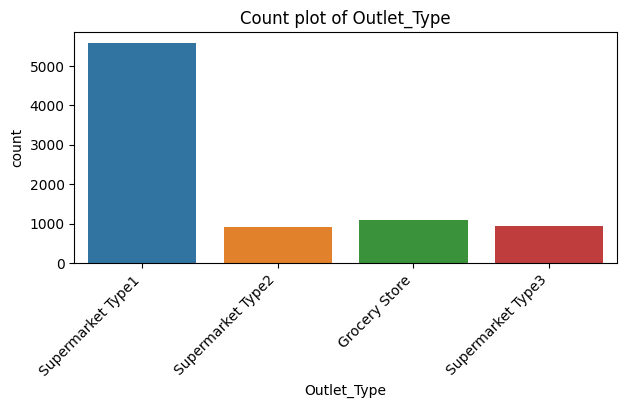

In [ ]:
# Count plot of all categorical columns
for i, col in enumerate(col_cat.columns):
    plt.figure(i,figsize=(7,3))
    ax = sns.countplot(x=col, data=col_cat)
    ax.set_title(f"Count plot of {col}")
    #ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

**Countplot intepretation for categorical columns**

Item_Fat_Content
  -  Most products sold are low fat

Item_Type
  - The food category sold the most are fruits and vegetables which is followed closely by snack foods

Outlet_Size
  - Most outlets are medium in size

Outlet_Location_Type
  - Most outlets are in a Tier 3 area

Outlet_Type
  - Most oultes are Supermarket Type1 outlets



In [ ]:
# Find correlations
corr = df_sales.corr(numeric_only=True)

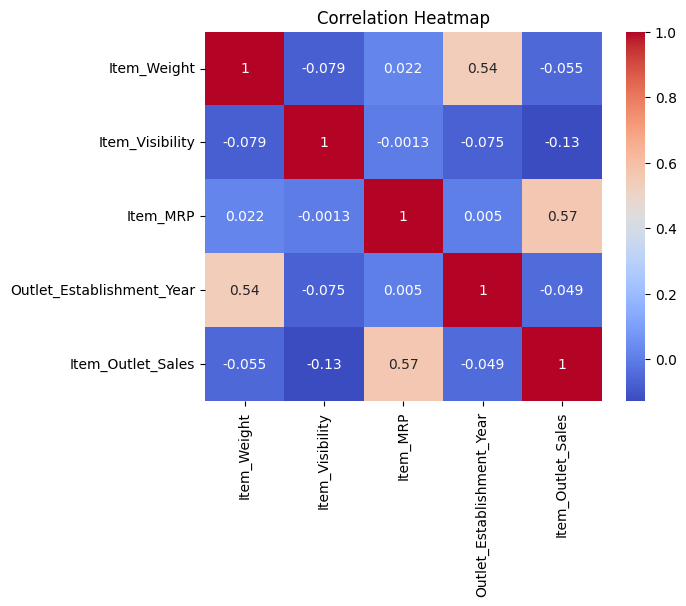

In [ ]:
# Heatmap to view correlations
ax = sns.heatmap(corr,annot=True, cmap='coolwarm')
ax.set(title='Correlation Heatmap');

- There's a positive correlation between Item_Weight and Outlet_Establishment_Year
- There's a positive correlation between Item_Outlet_Sales and Item_MRP


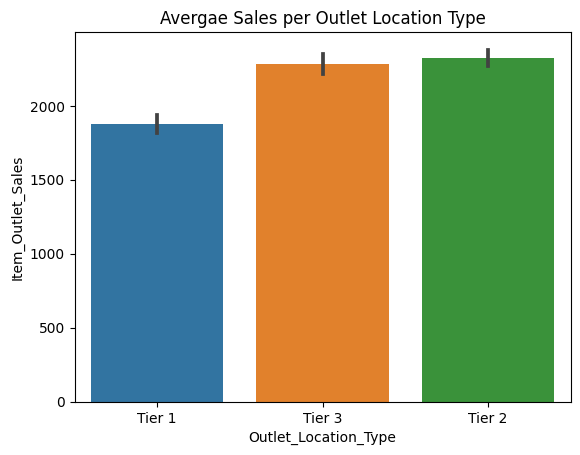

In [ ]:
# bar plot of Outlet_Location_Type vs Item_Outlet_Sales
ax = sns.barplot(data=df_sales,x='Outlet_Location_Type',y='Item_Outlet_Sales')
ax.set_title('Avergae Sales per Outlet Location Type');

- Tier 2 located outles have the highest average sales followed closely by Tier 3
- Tier 1 has the lowest average sales

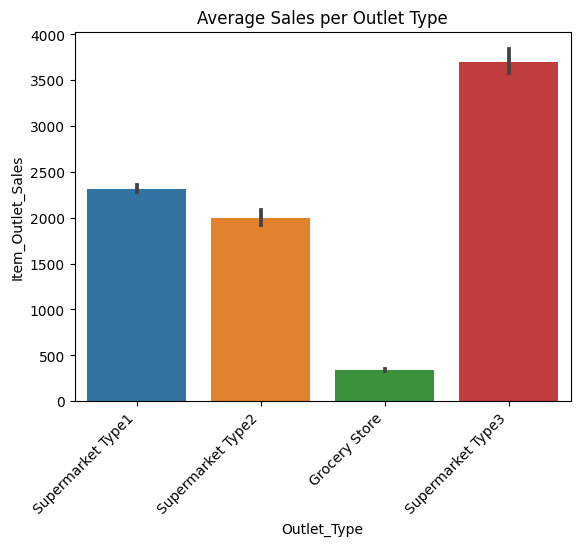

In [ ]:
# bar plot of Outlet_Type vs Item_Outlet_Sales
ax = sns.barplot(data=df_sales,x='Outlet_Type',y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Average Sales per Outlet Type');

- Supermarket Type3 outlets have the highest average sales
- Grocery Stores have the lowest average sales


##Feature Inspection

For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  

Remove the placeholders you added in week 2 and replace them with null values.This will allow our functions to report the presence and frequency of null values as part of our EDA.​

For each feature:



*   Add a new markdown header.
*   Paste the feature's definition from the data dictionary into a markdown cell.
*   Create a univariate visualization showing the distribution of values/categories. You may use the EDA functions from the previous lessons or create your own visualizations.
*   Answer the following questions from the Feature Inspection lesson in a markdown cell:
     *   What type of feature is it? (Categorical (nominal), ordinal, numeric)
     *   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     *   Is the feature constant or quasi-constant?
     *   What is the cardinality? Is it high (>10)?
     *   Would we know this feature before the target is determined?
     *   Is there a business case/understanding reason to exclude based on our business case?
*   Create a multivariate visualization plotting each feature vs. the target.
You may use the EDA functions from the previous lessons or create your own visualizations.​
*   Answer the following questions from the Feature Inspection lesson in a Markdown cell:
     *   Based on your business understanding, would you expect this feature to be a predictor of the target?
     *   Does this feature appear to be a predictor of the target?










In [ ]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Remove null placeholders and replace them with NaN values
# Item_Weight & Outlet_Size had duplicate values
# check Item_Weight, previously we filled the nulls with -1
df_sales['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
# replace -1 with NaN
df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1,np.nan)

In [ ]:
df_sales['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
df_sales['Item_Weight']==-1

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
#Check Outlet_Size, previously we filled this with MISSING
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
#Replace MISSING with NaN
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace('MISSING',np.NaN)

In [ ]:
df_sales['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Create EDA functions

In [ ]:
# define function for univariate categorical plot
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING', figsize = (6,4), order = None):

  # make a copy of the df so that we don't overwrite nulls
  temp_df = df_sales.copy()

  # calculate number of nulls and % of nulls before replacing nulls
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)*100

  # fill nulls with placeholder is fillna = True/defualt
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # create figure with figsize
  fig, ax = plt.subplots(figsize=figsize)

  # count plot for categorical features
  sns.countplot(data=temp_df,x=x,ax=ax,order=order)
  # rotate x axis and right align values
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # add dynamic title with feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  fig.tight_layout()
  plt.show

  # print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # cardinality - calculate number of unique values
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # Constant/quasi-constant - find value counts of each attribute
  val_counts = temp_df[x].value_counts(dropna=False)
  # find most common value (value_counts sorts values in desc order by default)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(temp_df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
      print("- Not constant or quasi-constant")
  return fig,ax

[Reference: explore_categorical function](https://login.codingdojo.com/m/717/16237/120171)

In [ ]:
# define function for univariate numerical plot
def explore_numerical(df, x, figsize=(6,5) ):

  # size ratios for first and second graph
  gridspec = {'height_ratios':[0.7,0.3]}
  #Create fig with two rows
  fig, axes = plt.subplots(nrows=2, figsize=figsize, sharex=True,gridspec_kw=gridspec)

  # plot hist on top graph
  sns.histplot(data=df, x=x, ax=axes[0])
  # plot boxplot on bottom graph
  sns.boxplot(data=df, x=x, ax=axes[1])

  axes[0].set_title(f"Column: {x}", fontweight='bold')
  fig.tight_layout()
  plt.show()

  # calculate null count and percentaches
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)*100

  # print null counts and percentages
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  # cardinality - calculate number of unique values
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # Constant/quasi-constant - find value counts of each attribute
  val_counts = df[x].value_counts(dropna=False)
  # find most common value (value_counts sorts values in desc order by default)
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: {most_common_val} occurs {freq} times ({round(perc_most_common,2)}%)")

  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
      print("- Not constant or quasi-constant")
  return fig,ax

[Reference: explore_numerical function](https://login.codingdojo.com/m/717/16237/120173)

In [ ]:
# define function for multivariate categorical vs numerical plot
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), fillna=True, placeholder = 'MISSING', order = None):

  # create copy of df again to replace null values
  temp_df = df.copy()

  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # drop nulls so that barplot and strip plot are aligned
  else:
    temp_df = temp_df.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)
  # barplot without error bar and 60% transparency
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black',errorbar=None)
  # striplot with order and hue order same as barplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, order=order, hue_order=order, legend=False, edgecolor='white', linewidth=0.5, size=3, zorder=0)

  ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')

  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


[Reference: plot_categorical_vs_target function](https://login.codingdojo.com/m/717/16237/120172)

In [ ]:
# define function for multivariate numerical vs numerical plot
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs):
  # find correlation between x and y
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  fig,ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws,**kwargs)

  ax.set_title(f"{x} vs {y} (r = {r})", fontweight='bold')

  plt.show()
  return fig, ax

[Reference: plot_numeric_vs_target function](https://login.codingdojo.com/m/717/16237/120173)

### Inspecting: Item_Weight

Definition: Weight of product

In [ ]:
# find data type
feature = 'Item_Weight'
df_sales[feature].dtype

dtype('float64')

#### Univariate Viz

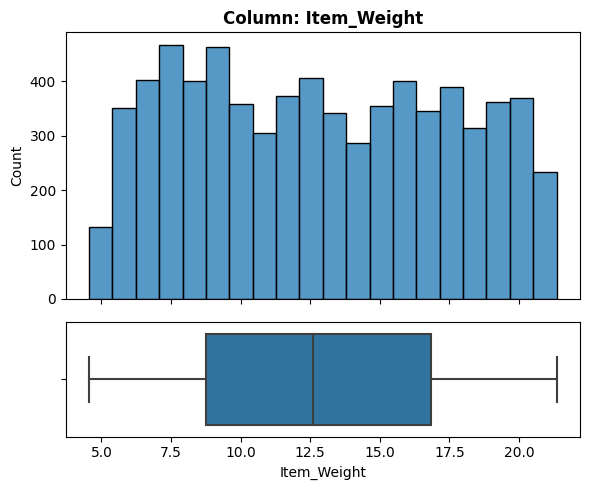

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: nan occurs 1463 times (17.17%)
- Not constant or quasi-constant


In [ ]:
explore_numerical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)

  * Numerical
*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   1463 null values (17.17%)
  *   Item_Weight has a uniform distrubution so the nulls can be imputed with the mean or the median which should be similar to one another (around 12.5)

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (N/A - numerical feature)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the item_weight could have an affect on the target




#### Multivariate Viz

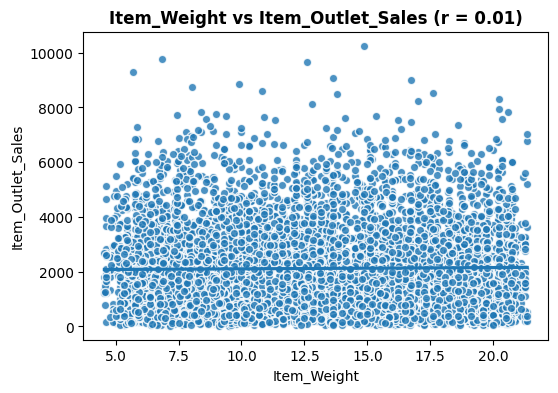

In [ ]:
plot_numeric_vs_target(df_sales, feature);




*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   I would expect the Item_Weight to affect the maximum price of the product but not necessary the total sales generated, however, consumers might have a preference for products of certain weights.

*   Does this feature appear to be a predictor of the target?
  * No, there is no correlation between Item_Weight and Item_Outlet_Sales



### Inspecting: Item_Fat_Content

Definition: Whether the product is low-fat or regular

In [ ]:
# find data type
feature = 'Item_Fat_Content'
df_sales[feature].dtype

dtype('O')

#### Univariate Viz

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant


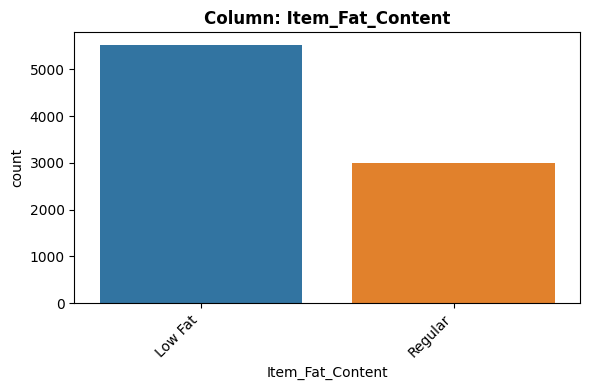

In [ ]:
explore_categorical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Ordinal

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (There are 2 unique values)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the Item_Fat_Content could affect the target (Item_Outlet_Sales)

#### Multivariate Viz

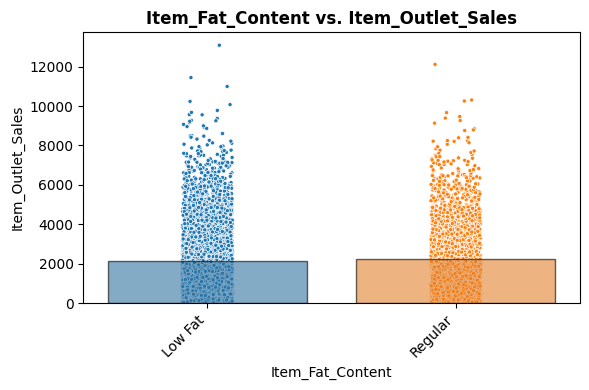

In [ ]:
plot_categorical_vs_target(df_sales, feature);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Not really. Low Fat and Regular fat products are usually the same price if the brand and product is the same.

*   Does this feature appear to be a predictor of the target?
  * No, the average Item_Outlet_Sales of Low Fat and Regular fat are the same. Both fat contents have a similar range of sale prices as well as some outliers.

### Inspecting: Item_Visibility

Definition: The percentage of total display area of all products in a store allocated to the particular product

In [ ]:
# find data type
feature = 'Item_Visibility'
df_sales[feature].dtype

dtype('float64')

#### Univariate Viz

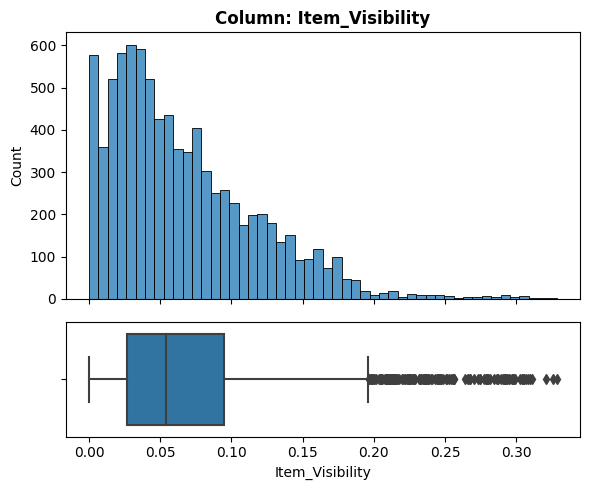

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: 0.0 occurs 526 times (6.17%)
- Not constant or quasi-constant


In [ ]:
explore_numerical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)

  * Numerical
*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (N/A - numerical feature)

*   Would we know this feature before the target is determined?
  *   Yes

*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the Item_Visability could affect the target (Item_Outlet_Sales)

#### Multivariate Viz

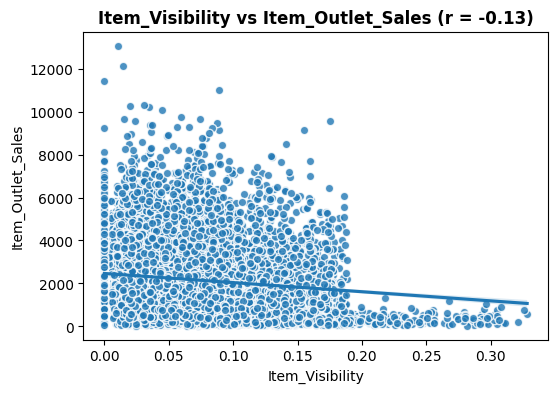

In [ ]:
plot_numeric_vs_target(df_sales, feature);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Yes, I would expect the Item_Outlet_Sales to increase as the Item_Visability increases

*   Does this feature appear to be a predictor of the target?
  * No, there is a weak negative correlation (-0.13) between Item_Visability and Item_Outlet_Sales

### Inspecting: Item_Type

Definition: The category to which the product belongs

In [ ]:
# find data type
feature = 'Item_Type'
df_sales[feature].dtype

dtype('O')

#### Univariate Viz

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant


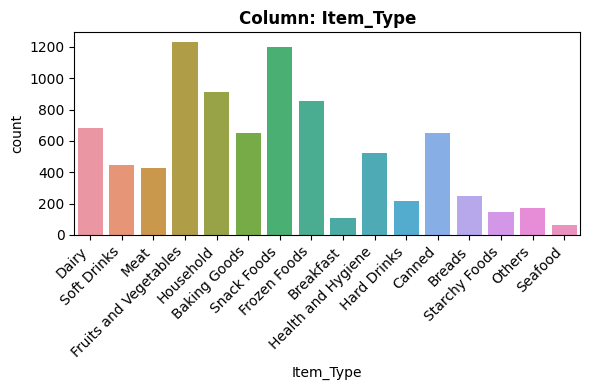

In [ ]:
explore_categorical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Nominal

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   Yes (There are 16 unique values)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the Item_Type could affect the target (Item_Outlet_Sales)

#### Multivariate Viz

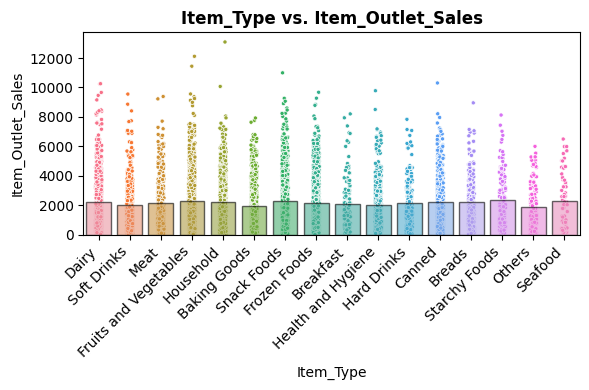

In [ ]:
plot_categorical_vs_target(df_sales, feature);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Yes. I would expect certain Item_Types to generate more Item_Outlet_Sales

*   Does this feature appear to be a predictor of the target?
  * No, the average Item_Outlet_Sales of each Item_Type are similar.

### Inspecting: Item_MRP

Definition: Maximum Retail Price (list price) of the product

In [ ]:
# find data type
feature = 'Item_MRP'
df_sales[feature].dtype

dtype('float64')

#### Univariate Viz

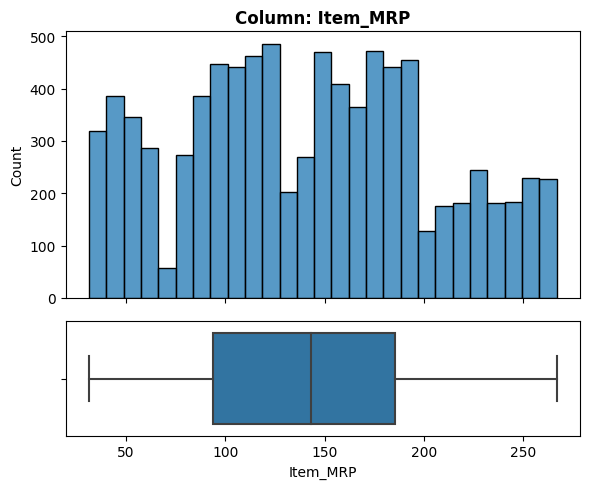

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: 172.0422 occurs 7 times (0.08%)
- Not constant or quasi-constant


In [ ]:
explore_numerical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)

  * Numerical
*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (N/A)

*   Would we know this feature before the target is determined?
  *   Yes

*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the Item_MRP could affect the target (Item_Outlet_Sales)

#### Multivariate Viz

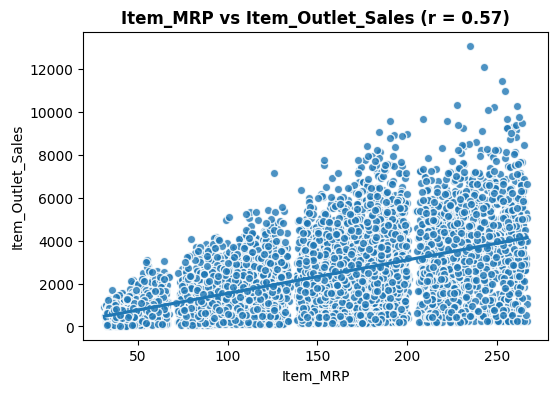

In [ ]:
plot_numeric_vs_target(df_sales, feature);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Yes, I would expect the Item_Outlet_Sales to increase as the Item_MRP increases

*   Does this feature appear to be a predictor of the target?
  * Yes, there is a positive correlation (0.57) between Item_MRP and Item_Outlet_Sales

### Inspecting: Outlet_Identifier

Definition: Store ID

In [ ]:
# find data type
feature = 'Outlet_Identifier'
df_sales[feature].dtype

dtype('O')

#### Univariate Viz

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant


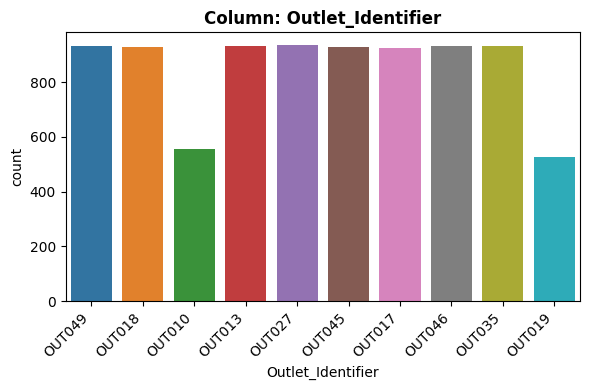

In [ ]:
explore_categorical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Nominal

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (There are exactly 10 unique values)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, part of the objective of the project is to determine the role different outlets have on the total outlet sales

#### Multivariate Viz

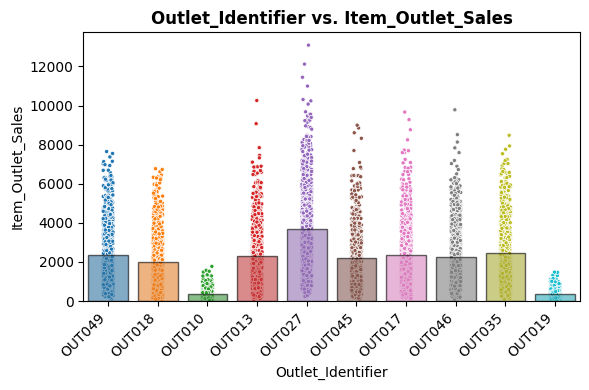

In [ ]:
plot_categorical_vs_target(df_sales, feature);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Yes, I would expect certain outlets to have higher sales than others

*   Does this feature appear to be a predictor of the target?
  * Yes, some outlets have higher sales than others

### Inspecing: Outlet_Establishment_Year

Definition: The year in which store was established

In [ ]:
# find data type
feature = 'Outlet_Establishment_Year'
df_sales[feature].dtype

dtype('int64')

#### Univariate Viz

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant


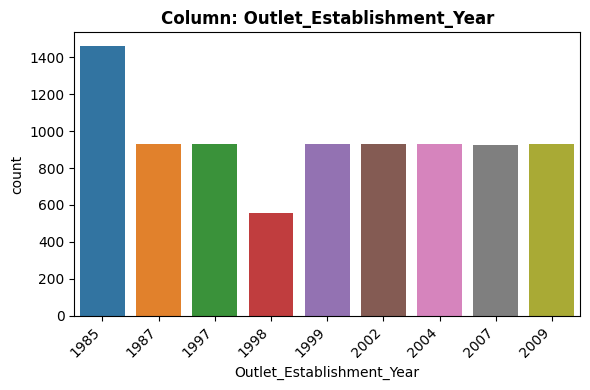

In [ ]:
explore_categorical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Ordinal

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (There are 9 unique values)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the Outlet_Establishment_Year could affect the target (Item_Outlet_Sales)

#### Multivariate Viz

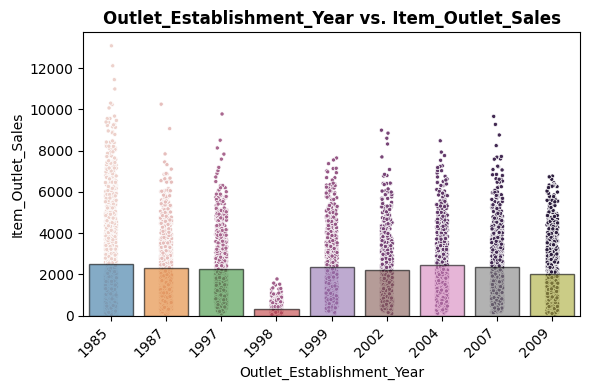

In [ ]:
plot_categorical_vs_target(df_sales, feature);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   No

*   Does this feature appear to be a predictor of the target?
  * Yes, stores extablished in certain years have higher sales

### Inspecting: Outlet_Size

Definition: The size of the store in terms of ground area covered

In [ ]:
# find data type
feature = 'Outlet_Size'
df_sales[feature].dtype

dtype('O')

#### Univariate Viz

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant


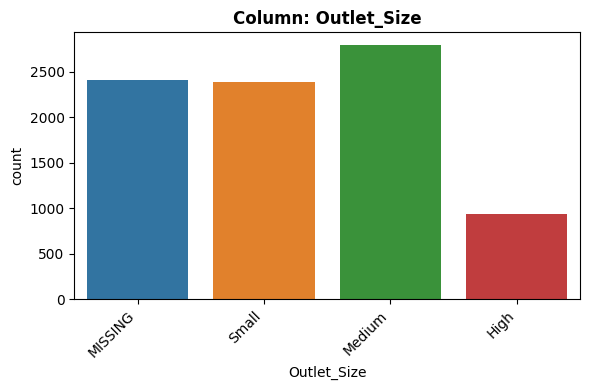

In [ ]:
order = ['MISSING','Small','Medium','High']
explore_categorical(df_sales,feature,order=order);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Ordinal

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   There are 2410 null values (28.28% of total)
  *   We could impute these nulls with the string 'MISSING'

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (There are 4 unique values)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the Outlet_Size could affect the target (Item_Outlet_Sales)

#### Multivariate Viz

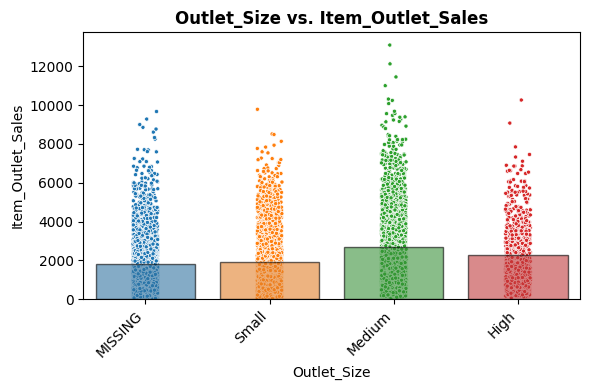

In [ ]:
plot_categorical_vs_target(df_sales, feature, order=order);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Yes, I would expect the larger stores to generate more sales

*   Does this feature appear to be a predictor of the target?
  * Yes, Medium and High sized stores have higher sales

### Inspecting: Outlet_Location_Type

Definition: The type of area in which the store is located

In [ ]:
# find data type
feature = 'Outlet_Location_Type'
df_sales[feature].dtype

dtype('O')

#### Univariate Viz

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant


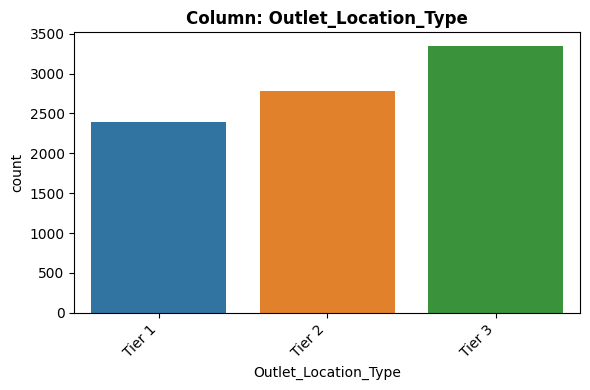

In [ ]:
order = ['Tier 1','Tier 2','Tier 3']
explore_categorical(df_sales,feature, order=order);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Ordinal

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (There are 3 unique values)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, outlet location could affect the target

#### Multivariate Viz

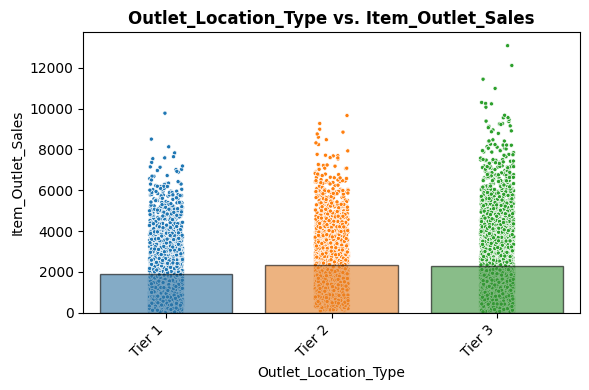

In [ ]:
plot_categorical_vs_target(df_sales, feature,order=order);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Yes, I would expect stores located in certain areas to have more sales

*   Does this feature appear to be a predictor of the target?
  * Yes, Tier 2 and 3 have the most average sales. Tier 3 outlets also have more outliers.

### Inspecting: Outlet_Type

Definition: Whether the outlet is a grocery store or some sort of supermarket

In [ ]:
# find data type
feature = 'Outlet_Type'
df_sales[feature].dtype

dtype('O')

#### Univariate Viz

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant


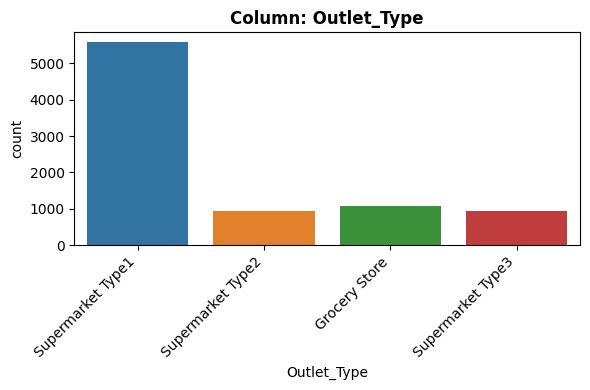

In [ ]:
explore_categorical(df_sales,feature);

*   What type of feature is it? (Categorical (nominal), ordinal, numeric)
  * Nominal

*   How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  *   0 null values

*   Is the feature constant or quasi-constant?
  *   No

*   What is the cardinality? Is it high (>10)?
  *   No (There are 4 unique values)
*   Would we know this feature before the target is determined?
  *   Yes
*   Is there a business case/understanding reason to exclude based on our business case?
  *   No, the Outlet_Type could affect the target (Item_Outlet_Sales)

#### Mulitvariate Viz

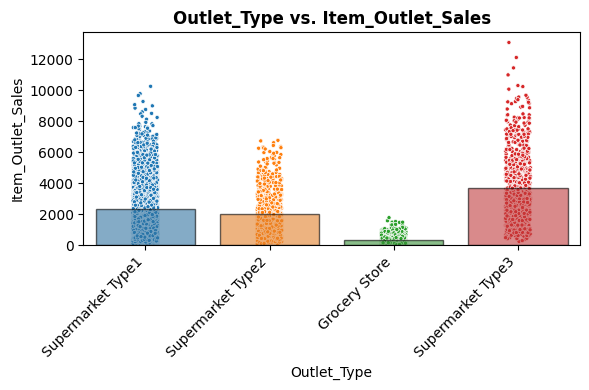

In [ ]:
plot_categorical_vs_target(df_sales, feature);

*  Based on your business understanding, would you expect this feature to be a predictor of the target?
  *   Yes, I would expect the Outlet_Type to have an affect on the total sales.

*   Does this feature appear to be a predictor of the target?
  * Yes, Supermarket Type3 has the highest average Item_Outlet_Sales

In [ ]:
## Questions
## 1. Why is my categorical function printing the f statements at the top of my graph and not the bottom
## 2. Is a year value numerical or ordinal
## 3. Why is the stripplot hue of my multivariate year plot not the same as the colours on the barplot

## Clean and process data for machine learning

You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

* Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
* Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
* Perform a train test split
* Create a preprocessing object to prepare the dataset for Machine Learning
Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [1]:
# Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(transform_output='pandas')

In [3]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Save filepath and load data
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)

In [5]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# check number of duplicates
df_sales.duplicated().sum()

0

In [7]:
# check number of nulls
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# check value counts of Item_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
# check value counts of Outlet_Size  column
df_sales['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
# replace inconsistent rows in Item_Fat_Content
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                     'reg':'Regular',
                                                                     'low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
df_sales = df_sales.set_index('Item_Identifier')
df_sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df_sales_ml = df_sales.copy()

In [14]:
target = 'Item_Outlet_Sales'
y = df_sales_ml[target]
X = df_sales_ml.drop(columns=[target])

In [15]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [16]:
y.head()

Item_Identifier
FDA15    3735.1380
DRC01     443.4228
FDN15    2097.2700
FDX07     732.3800
NCD19     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, NCG06 to NCN30
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


Numerical Columns
* Item_Weight
* Item_Visability
* Item_MRP
* Outlet_Establishment_Year

Ordinal Columns
* Item_Fat_Content
* Outlet_Size
* Outlet_Location_Type

Nominal Columns
* Item_Type
* Outlet_Identifier
* Outlet_Type

In [19]:
# List of numerical columns
num_cols = X_train.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [20]:
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

In [21]:
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [22]:
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [23]:
# List of ordinal columns
ord_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

In [24]:
impute_ord = SimpleImputer(strategy='constant', fill_value='MISSING')

In [25]:
fat_content_order = ['Low Fat','Regular']
outlet_size_order = ['MISSING','Small','Medium','High']
outlet_location_order = ['Tier 1','Tier 2','Tier 3']

In [26]:
ordinal_category_orders = [fat_content_order, outlet_size_order,outlet_location_order ]

In [27]:
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)

In [28]:
scaler_ord = StandardScaler()

In [29]:
ord_pipe = make_pipeline(impute_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                            ['MISSING', 'Small', 'Medium',
                                             'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [30]:
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Low Fat', 'Regular'],
                                             ['MISSING', 'Small', 'Medium',
                                              'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type'])

In [31]:

# list of nominal columns
ohe_cols = X_train.select_dtypes("object").drop(columns=ord_cols).columns
ohe_cols

Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')

In [32]:
impute_na = SimpleImputer(strategy='constant', fill_value = "MISSING")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [33]:
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [34]:
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

In [35]:
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [36]:
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('ord...
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [37]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('ord...
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [38]:
# Transform the training data
X_train_tf = col_transformer.transform(X_train)
# Transform the testing data
X_test_tf = col_transformer.transform(X_test)
# View the processed training data
X_train_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
NCG06,0.827485,-0.712775,1.828109,1.327849,-0.740321,0.748125,1.084948,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
FDV57,0.566644,-1.291052,0.603369,1.327849,1.350766,0.748125,1.084948,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
FDM27,-0.121028,1.813319,0.244541,0.136187,1.350766,0.748125,-1.384777,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
FDG24,-1.158464,-1.004931,-0.952591,0.732018,-0.740321,-0.264370,-0.149914,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDD05,1.538870,-0.965484,-0.336460,0.493686,-0.740321,-1.276865,-0.149914,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
X_train_tf.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.07,0.03,0.01,...,0.06,0.11,0.11,0.11,0.11,0.11,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.26,0.16,0.11,...,0.24,0.32,0.31,0.31,0.31,0.31,0.33,0.48,0.31,0.32
min,-1.97,-1.29,-1.77,-1.53,-0.74,-1.28,-1.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.80,-0.76,-0.76,-1.29,-0.74,-1.28,-1.38,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.05,-0.23,0.03,0.14,-0.74,-0.26,-0.15,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.77,0.56,0.72,0.73,1.35,0.75,1.08,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
max,2.01,5.13,1.99,1.33,1.35,1.76,1.08,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [40]:
X_train_tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, NCG06 to NCN30
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Outlet_Establishment_Year        6392 non-null   float64
 4   Item_Fat_Content                 6392 non-null   float64
 5   Outlet_Size                      6392 non-null   float64
 6   Outlet_Location_Type             6392 non-null   float64
 7   Item_Type_Baking Goods           6392 non-null   float64
 8   Item_Type_Breads                 6392 non-null   float64
 9   Item_Type_Breakfast              6392 non-null   float64
 10  Item_Type_Canned                 6392 non-null   float64
 11  Item_Type_Dairy                  6392 non-null   float64
 12  Item_Type_Frozen Foo

In [42]:
X_test_tf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,
FDI28,0.341372,-0.776646,-0.998816,-1.293807,-0.740321,1.760619,1.084948,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCM17,-1.169135,0.100317,-1.585194,-0.102145,-0.740321,-0.264370,-1.384777,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
FDC14,0.388798,-0.482994,-1.595784,0.136187,1.350766,0.748125,-1.384777,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
DRC36,-0.049889,-0.415440,0.506592,-1.532139,1.350766,0.748125,1.084948,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
FDS27,-0.632039,-1.047426,0.886725,0.732018,1.350766,-0.264370,-0.149914,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
X_test_tf.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,...,2131.00,2131.0,2131.0,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,0.01,-0.06,-0.01,-0.01,0.01,-0.04,0.08,0.04,0.01,...,0.07,0.1,0.1,0.11,0.11,0.12,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.99,1.00,1.01,1.01,0.27,0.19,0.11,...,0.25,0.3,0.3,0.31,0.31,0.32,0.34,0.47,0.31,0.3
min,-1.96,-1.29,-1.75,-1.53,-0.74,-1.28,-1.38,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.88,-0.76,-0.78,-1.29,-0.74,-1.28,-1.38,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,-0.05,-0.24,-0.15,0.14,-0.74,-0.26,-0.15,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.74,0.56,0.64,0.73,1.35,0.75,1.08,0.00,0.00,0.00,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.0
max,2.01,4.79,1.99,1.33,1.35,1.76,1.08,1.00,1.00,1.00,...,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0


In [44]:
X_test_tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2131 entries, FDI28 to FDM52
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      2131 non-null   float64
 1   Item_Visibility                  2131 non-null   float64
 2   Item_MRP                         2131 non-null   float64
 3   Outlet_Establishment_Year        2131 non-null   float64
 4   Item_Fat_Content                 2131 non-null   float64
 5   Outlet_Size                      2131 non-null   float64
 6   Outlet_Location_Type             2131 non-null   float64
 7   Item_Type_Baking Goods           2131 non-null   float64
 8   Item_Type_Breads                 2131 non-null   float64
 9   Item_Type_Breakfast              2131 non-null   float64
 10  Item_Type_Canned                 2131 non-null   float64
 11  Item_Type_Dairy                  2131 non-null   float64
 12  Item_Type_Frozen Foo